# POLYNOMIAL REGRESSION
Polynomial regression is a form of regression analysis in which the relationship between the independenr variable x and dependent variable y is modeled as an nth degree polynomial of x.

###Formula
f(x)=a0+a1x+a2x^2+....+anx^n

a=alpha

### X = dataset.iloc[:, 1:-1].values-->
: → selects all rows

1:-1 → selects columns from index 1 up to (but not including) the last column

.values → converts the DataFrame to a NumPy array

### y = dataset.iloc[:, -1].values-->
: → selects all rows

-1 → selects the last column

.values → converts the column into a NumPy array

* plt.plot(X, model.predict(X)) is valid only for simple linear regression.
For multiple linear regression, model performance is visualized using actual vs predicted plots and coefficient analysis.

Dataset Preview:
            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000
✅ Models Trained Successfully!


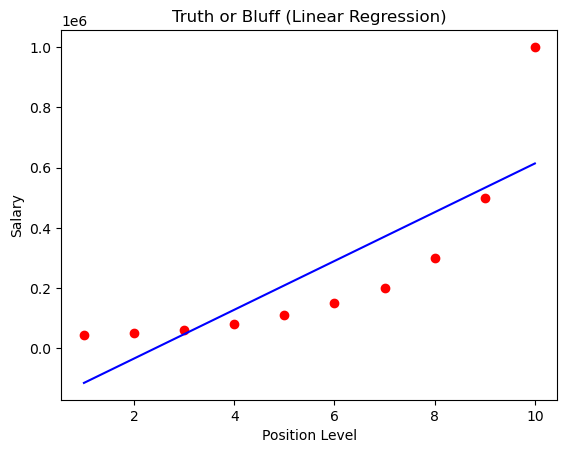

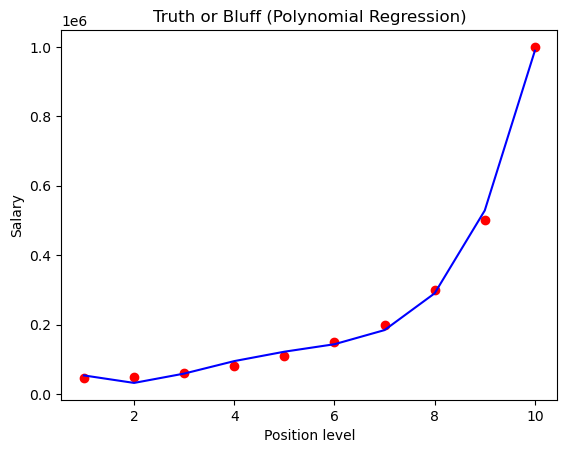

C:\Users\Abhir\AppData\Local\Temp\ipykernel_12376\3973955481.py:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


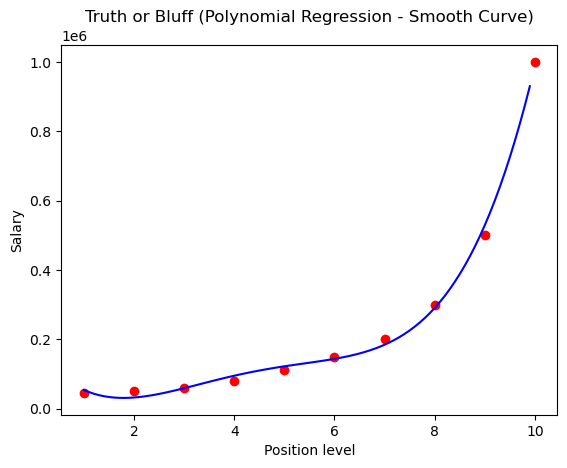

Linear Regression Prediction for Level 6.5: [330378.78787879]
Polynomial Regression Prediction for Level 6.5: [158862.45265153]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 
dataset = pd.read_csv("Position_Salaries.csv")
 
X = dataset.iloc[:, 1:-1].values 
y = dataset.iloc[:, -1].values

print("Dataset Preview:")
print(dataset.head())
 
 
# Training the Linear Regression model on the whole dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
 
# Training the Polynomial Regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
print("✅ Models Trained Successfully!")
 
 
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()
 
 
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
 
 
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression - Smooth Curve)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
 
 
# Predicting a new result with Linear Regression
linear_prediction = lin_reg.predict([[6.5]])
print("Linear Regression Prediction for Level 6.5:", linear_prediction)
 
 
# Predicting a new result with Polynomial Regression
poly_prediction = lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
print("Polynomial Regression Prediction for Level 6.5:", poly_prediction)
 
 
 
 

* X=data[["enginesize"]]-->use double braces because x should be 2D not 1D

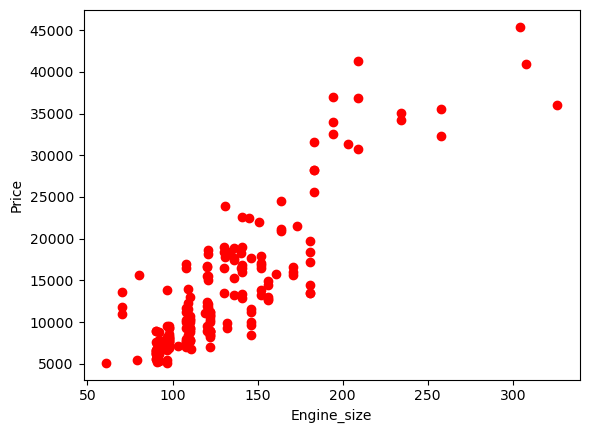

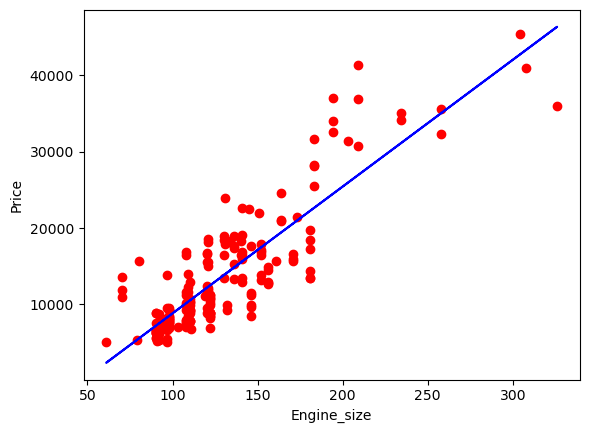

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

data=pd.read_csv("CarPrice_Assignment.csv")

X=data[["enginesize"]]
y=data["price"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)


poly_reg=PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

poly_pred=lin_reg_2.predict(poly_reg.fit_transform([[200]]))

plt.scatter(X,y,color="red")
plt.xlabel("Engine_size")
plt.ylabel("Price")
plt.show()

plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.xlabel("Engine_size")
plt.ylabel("Price")
plt.show()



In [25]:
train_pred=lin_reg.predict(X_train)
from sklearn.metrics import r2_score
r2_scor=r2_score(train_pred,y_train)
r2_scor


0.6679197211195318

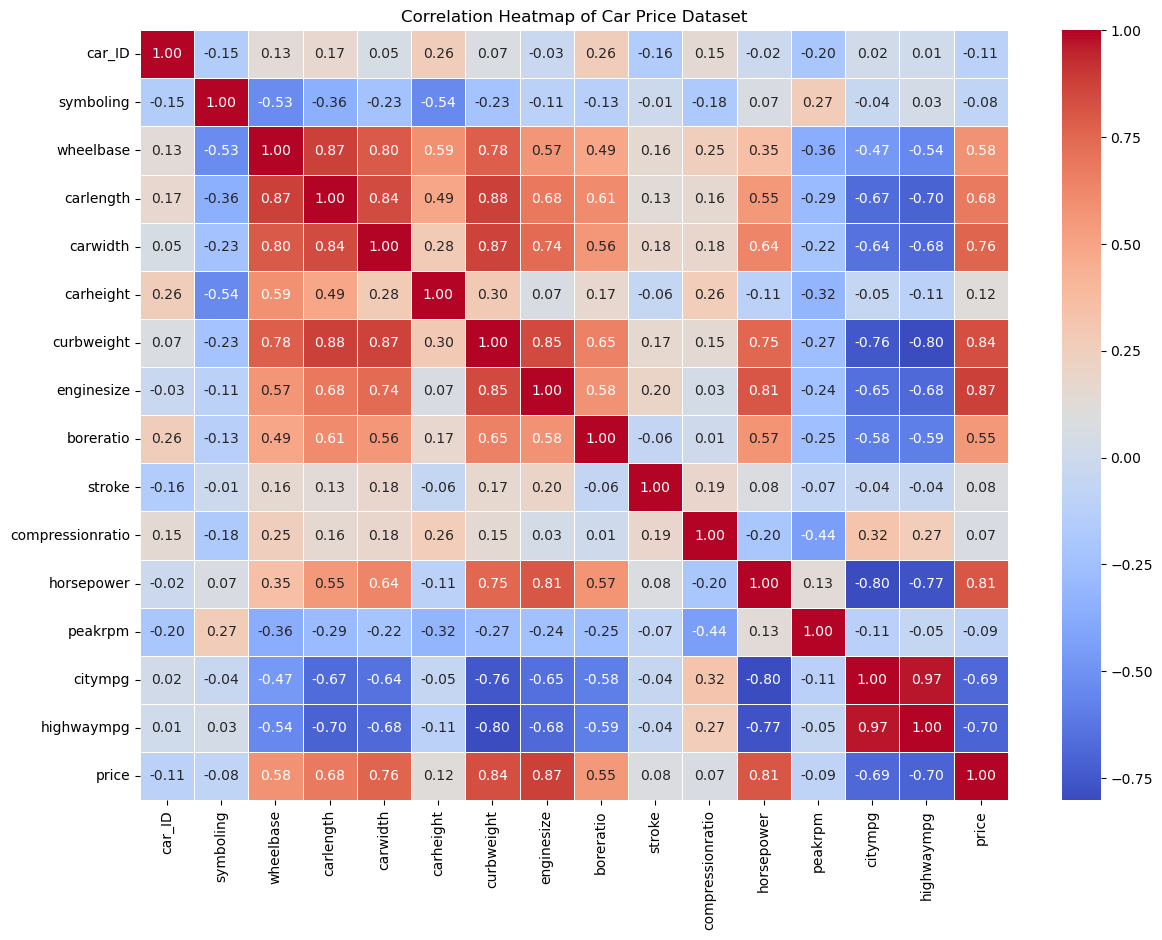

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("CarPrice_Assignment.csv")

# Select only numerical columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Heatmap of Car Price Dataset")
plt.show()


In [7]:
import pandas as pd

# Load dataset
df = pd.read_csv("CarPrice_Assignment.csv")

# Target column
target = "price"

# Select numerical features
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation of features with target
target_corr = numeric_df.corr()[target].drop(target)

threshold = 0.1

print(f"\nFeatures with very weak or no correlation with target ({target}):\n")

for feature, value in target_corr.items():
    if abs(value) < threshold:
        print(f"{feature:20s} : {value:.3f}")



Features with very weak or no correlation with target (price):

symboling            : -0.080
stroke               : 0.079
compressionratio     : 0.068
peakrpm              : -0.085


In [4]:
import pandas as pd

# Load dataset
df = pd.read_csv("CarPrice_Assignment.csv")

# Target column
target = "price"

# Select numerical columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation with target
target_corr = numeric_df.corr()[target].drop(target)

# Function to label correlation strength
def correlation_label(value):
    if value >= 0.7:
        return "Strong Positive"
    elif 0.4 <= value < 0.7:
        return "Moderate Positive"
    elif 0.1 <= value < 0.4:
        return "Weak Positive"
    elif -0.1 < value < 0.1:
        return "No Correlation"
    elif -0.4 < value <= -0.1:
        return "Weak Negative"
    elif -0.7 < value <= -0.4:
        return "Moderate Negative"
    else:
        return "Strong Negative"

# Print correlations
print(f"\nCorrelation of input features with target ({target}):\n")

for feature, value in target_corr.items():
    print(f"{feature:20s} : {value:.2f} → {correlation_label(value)}")



Correlation of input features with target (price):

car_ID               : -0.11 → Weak Negative
symboling            : -0.08 → No Correlation
wheelbase            : 0.58 → Moderate Positive
carlength            : 0.68 → Moderate Positive
carwidth             : 0.76 → Strong Positive
carheight            : 0.12 → Weak Positive
curbweight           : 0.84 → Strong Positive
enginesize           : 0.87 → Strong Positive
boreratio            : 0.55 → Moderate Positive
stroke               : 0.08 → No Correlation
compressionratio     : 0.07 → No Correlation
horsepower           : 0.81 → Strong Positive
peakrpm              : -0.09 → No Correlation
citympg              : -0.69 → Moderate Negative
highwaympg           : -0.70 → Moderate Negative


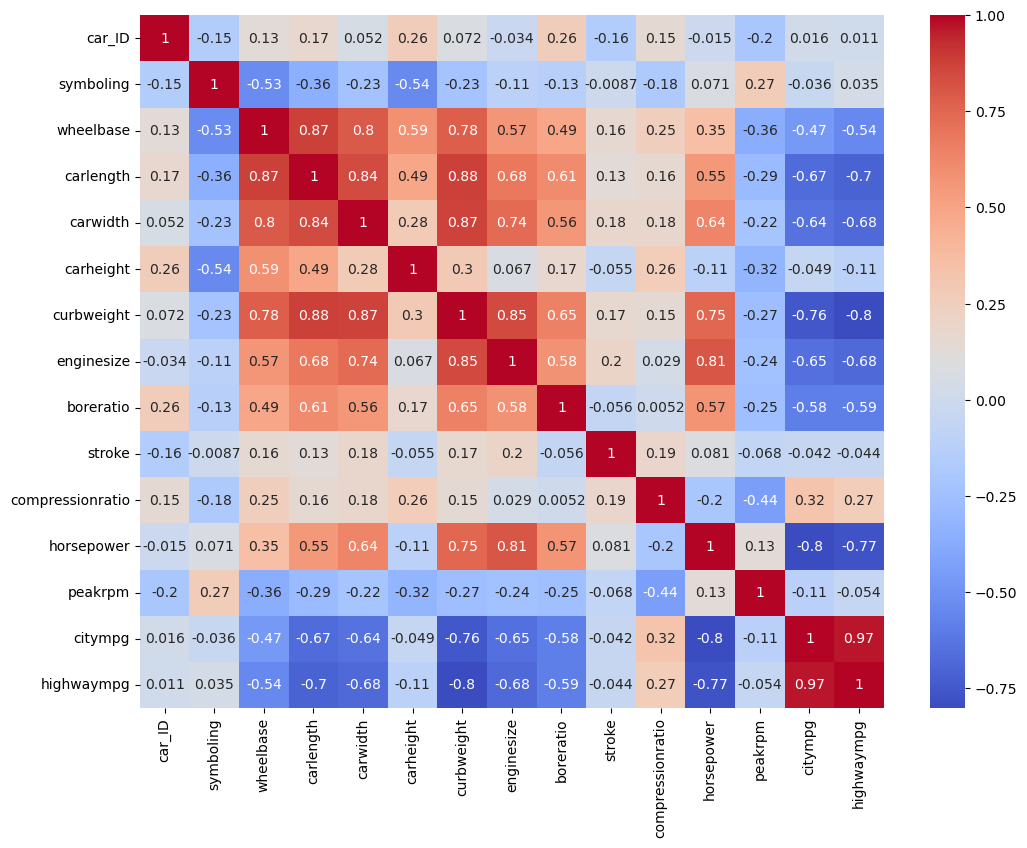

In [2]:
x=df.drop('price',axis=1)
 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
sns.heatmap(x.corr(numeric_only=True), annot=True,cmap='coolwarm')
plt.show()
 

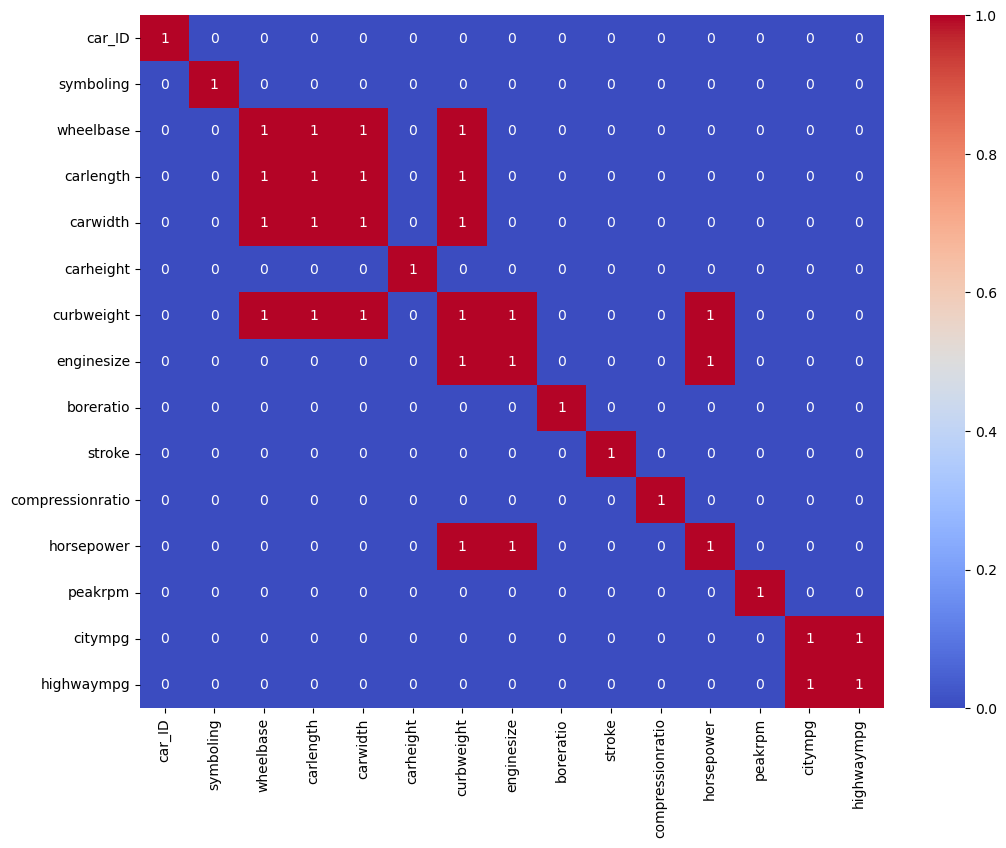

In [3]:
x=df.drop('price',axis=1)
 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
sns.heatmap(x.corr(numeric_only=True)>0.75, annot=True,cmap='coolwarm')
plt.show()
 

In [5]:
import pandas as pd

# Load dataset
df = pd.read_csv("CarPrice_Assignment.csv")

# Select numerical columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
corr = numeric_df.corr()

# Function to label correlation strength
def correlation_label(value):
    if value >= 0.7:
        return "Strong Positive"
    elif 0.4 <= value < 0.7:
        return "Moderate Positive"
    elif 0.1 <= value < 0.4:
        return "Weak Positive"
    elif -0.1 < value < 0.1:
        return "No Correlation"
    elif -0.4 < value <= -0.1:
        return "Weak Negative"
    elif -0.7 < value <= -0.4:
        return "Moderate Negative"
    else:
        return "Strong Negative"

# Print correlations with labels
for col in corr.columns:
    print(f"\nCorrelation of {col} with other features:")
    for index in corr.index:
        if col != index:
            label = correlation_label(corr.loc[index, col])
            print(f"{index:20s} : {corr.loc[index, col]:.2f} → {label}")



Correlation of car_ID with other features:
symboling            : -0.15 → Weak Negative
wheelbase            : 0.13 → Weak Positive
carlength            : 0.17 → Weak Positive
carwidth             : 0.05 → No Correlation
carheight            : 0.26 → Weak Positive
curbweight           : 0.07 → No Correlation
enginesize           : -0.03 → No Correlation
boreratio            : 0.26 → Weak Positive
stroke               : -0.16 → Weak Negative
compressionratio     : 0.15 → Weak Positive
horsepower           : -0.02 → No Correlation
peakrpm              : -0.20 → Weak Negative
citympg              : 0.02 → No Correlation
highwaympg           : 0.01 → No Correlation
price                : -0.11 → Weak Negative

Correlation of symboling with other features:
car_ID               : -0.15 → Weak Negative
wheelbase            : -0.53 → Moderate Negative
carlength            : -0.36 → Weak Negative
carwidth             : -0.23 → Weak Negative
carheight            : -0.54 → Moderate Negative
curb

* numpy.aboslute function makes the values only positive


In [6]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("CarPrice_Assignment.csv")

# Select numerical features
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
corr_matrix = numeric_df.corr()

threshold = 0.75

print(f"\nFeature-Feature Correlations with |value| > {threshold}:\n")

# Loop through upper triangle only (avoid duplicates)
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > threshold:
            print(f"{corr_matrix.columns[i]:20s} ↔ {corr_matrix.columns[j]:20s} : {corr_value:.2f}")



Feature-Feature Correlations with |value| > 0.75:

wheelbase            ↔ carlength            : 0.87
wheelbase            ↔ carwidth             : 0.80
wheelbase            ↔ curbweight           : 0.78
carlength            ↔ carwidth             : 0.84
carlength            ↔ curbweight           : 0.88
carwidth             ↔ curbweight           : 0.87
carwidth             ↔ price                : 0.76
curbweight           ↔ enginesize           : 0.85
curbweight           ↔ horsepower           : 0.75
curbweight           ↔ citympg              : -0.76
curbweight           ↔ highwaympg           : -0.80
curbweight           ↔ price                : 0.84
enginesize           ↔ horsepower           : 0.81
enginesize           ↔ price                : 0.87
horsepower           ↔ citympg              : -0.80
horsepower           ↔ highwaympg           : -0.77
horsepower           ↔ price                : 0.81
citympg              ↔ highwaympg           : 0.97


In [12]:
df1=df


In [23]:
cols_to_remove = [
    "horsepower",
    "highwaympg"
]

df = df.drop(columns=cols_to_remove)

print("Remaining columns:")
print(df.columns)


Remaining columns:
Index(['car_ID', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'citympg', 'price'],
      dtype='object')


In [24]:
df.head()

,car_ID,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,citympg,price
0,1,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,21,13495.0
1,2,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,21,16500.0
2,3,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,19,16500.0
3,4,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,24,13950.0
4,5,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,18,17450.0


In [35]:
from sklearn.linear_model import RidgeCV
import numpy as np
import pandas as pd
alphas=np.arange(0.1,10,0.05)
df=pd.read_csv("CarPrice_Assignment.csv")
X=df.drop("price",axis=1)
y=df["price"]
X = X.select_dtypes(include=np.number)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=RidgeCV(alphas=alphas)

model.fit(X_train, y_train)

print("Best alpha:", model.alpha_)

print("best score: ",model.score(X_test,y_test))
 


Best alpha: 7.650000000000002
best score:  0.8515546609886683


In [36]:
from sklearn.linear_model import LassoCV
import numpy as np
import pandas as pd
alphas=np.arange(0.1,10,0.05)
df=pd.read_csv("CarPrice_Assignment.csv")
X=df.drop("price",axis=1)
y=df["price"]
X = X.select_dtypes(include=np.number)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=LassoCV(alphas=alphas)

model.fit(X_train, y_train)

print("Best alpha:", model.alpha_)

print("best score: ",model.score(X_test,y_test))
 


Best alpha: 9.950000000000003
best score:  0.852184808140241


In [ ]:
----